In [38]:
import pandas as pd
import numpy as np
import datetime as dt

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)

### Import data

In [40]:
Order_Summary = pd.read_excel(r"D:\Data_Science\Catalys_Assessment\Catalys_Assessment.xlsx", sheet_name="Order_Summary")
Facebook = pd.read_excel(r"D:\Data_Science\Catalys_Assessment\Catalys_Assessment.xlsx", sheet_name="Facebook_Data")
Google = pd.read_excel(r"D:\Data_Science\Catalys_Assessment\Catalys_Assessment.xlsx", sheet_name="Google_Data")

### Data Cleaning

In [44]:
## Data Shape
Order_Summary.shape

(12253, 13)

In [45]:
## Column Types
Order_Summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12253 entries, 0 to 12252
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   month                  12253 non-null  datetime64[ns]
 1   customer_type          12246 non-null  object        
 2   customer_id            12253 non-null  int64         
 3   customer_id.1          12253 non-null  object        
 4   cancelled              12253 non-null  object        
 5   order_id               12253 non-null  int64         
 6   shipping_city          12252 non-null  object        
 7   orders                 12253 non-null  int64         
 8   total_sales            12253 non-null  float64       
 9   average_order_value    12253 non-null  float64       
 10  net_quantity           12253 non-null  int64         
 11  ordered_item_quantity  12253 non-null  int64         
 12  average_units_ordered  12253 non-null  int64         
dtypes

In [47]:
## Data Summanry
Order_Summary.describe().T

,count,mean,min,25%,50%,75%,max,std
month,12253,2023-09-21 23:10:38.439565824,2023-01-01 00:00:00,2023-08-01 00:00:00,2023-10-01 00:00:00,2023-12-01 00:00:00,2024-03-01 00:00:00,NaN
customer_id,12253.0,6783707492773.729492,0.0,6684615082122.0,6736420569226.0,6925091143818.0,7155693158538.0,230577300284.111298
order_id,12253.0,5253440239764.195312,4953351520394.0,5174281601162.0,5230003617930.0,5358105034890.0,5459687997578.0,114860180063.859329
orders,12253.0,0.992165,0.0,1.0,1.0,1.0,1.0,0.088171
total_sales,12253.0,2012.177751,-5500.0,1260.0,2285.0,2400.0,14200.0,1215.21415
average_order_value,12253.0,2275.526757,0.0,1260.0,2300.0,2400.0,874000.0,7960.91022
net_quantity,12253.0,1.011181,-2.0,1.0,1.0,1.0,7.0,0.523327
ordered_item_quantity,12253.0,1.13915,0.0,1.0,1.0,1.0,380.0,3.449673
average_units_ordered,12253.0,1.13915,0.0,1.0,1.0,1.0,380.0,3.449673


In [49]:
## Null Values within the data
Order_Summary.isnull().sum()

month                    0
customer_type            7
customer_id              0
customer_id.1            0
cancelled                0
order_id                 0
shipping_city            1
orders                   0
total_sales              0
average_order_value      0
net_quantity             0
ordered_item_quantity    0
average_units_ordered    0
dtype: int64

In [ ]:
## Different Customer Types
First_time = Order_Summary[(Order_Summary["customer_type"] == 'First-time') & (Order_Summary["cancelled"] == "No")]
Returning = Order_Summary[(Order_Summary["customer_type"] == 'Returning')]

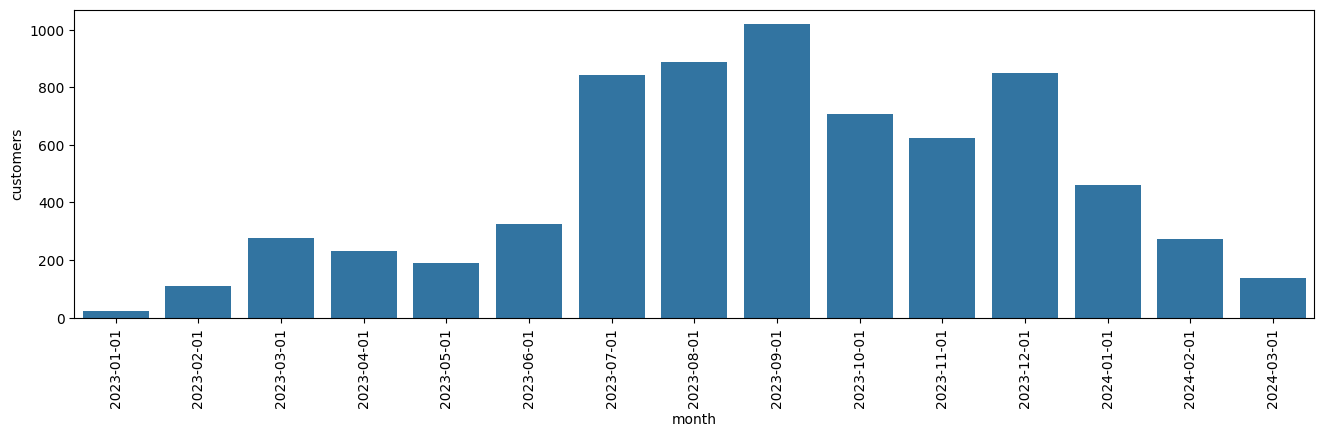

In [53]:
## New Customers and revenue generated bu them
First_time_customers = First_time.groupby(by = ["month"], as_index=False).agg({"customer_id":"nunique", "total_sales":"sum"}).rename(columns={"customer_id":"customers"})
fig, axs = plt.subplots(nrows = 1, ncols = 1, figsize = (16,4))
sns.barplot(data = First_time_customers, x = "month", y = "customers", ax = axs)
axs.tick_params(axis = 'x', rotation = 90)

### Return on Ad Spend

In [56]:
## Facebook Data Preprocessing
Facebook["Month_new"] = Facebook["Month"].apply(lambda x:x.split()[0])
Facebook["Month_new"] = pd.to_datetime(Facebook["Month_new"])

In [58]:
## Orders resulting in revenue
Order_Summary_NC = Order_Summary[Order_Summary["cancelled"] == "No"]
Order_Summary_NC = Order_Summary_NC.groupby(by = ["month"], as_index=False).agg({"customer_id":"nunique","total_sales":"sum"}).rename(columns = {"customer_id":"customers"})

In [59]:
## Facebook Spends and Revenue merge
Order_Summary_NC = pd.merge(Order_Summary_NC, Facebook, left_on=["month"], right_on=["Month_new"])
Order_Summary_NC = Order_Summary_NC[["month", "customers", "total_sales","Amount spent (INR)"]].rename(columns={"Amount spent (INR)":"Facebook Spends"})

In [60]:
## Google Data Preprocessing
Google["month_str"] = Google["Month"].astype("str")
Google["month_corr"] = Google["month_str"].str.replace("2024", "01")
Google["month_corr"] = Google["month_corr"].apply(lambda x : x[3:5]+'-' + x[:2]+ '-' + '20'+x[-2:])
Google["Month"] = pd.to_datetime(Google["month_corr"])
Google = Google[["Month", "Amount Spent", "Clicks", "Impression"]]

In [61]:
## Revenue and Google Merge
Order_Summary_NC = pd.merge(Order_Summary_NC, Google, left_on = "month", right_on="Month", how = "left")
Order_Summary_NC = Order_Summary_NC[["month", "customers", "total_sales","Facebook Spends", "Amount Spent"]].rename(columns = {"Amount Spent":"Google Spends"})

In [62]:
## Return on Ad Spends
Order_Summary_NC["ROAS"] = Order_Summary_NC["total_sales"]/(Order_Summary_NC["Facebook Spends"] + Order_Summary_NC["Google Spends"])

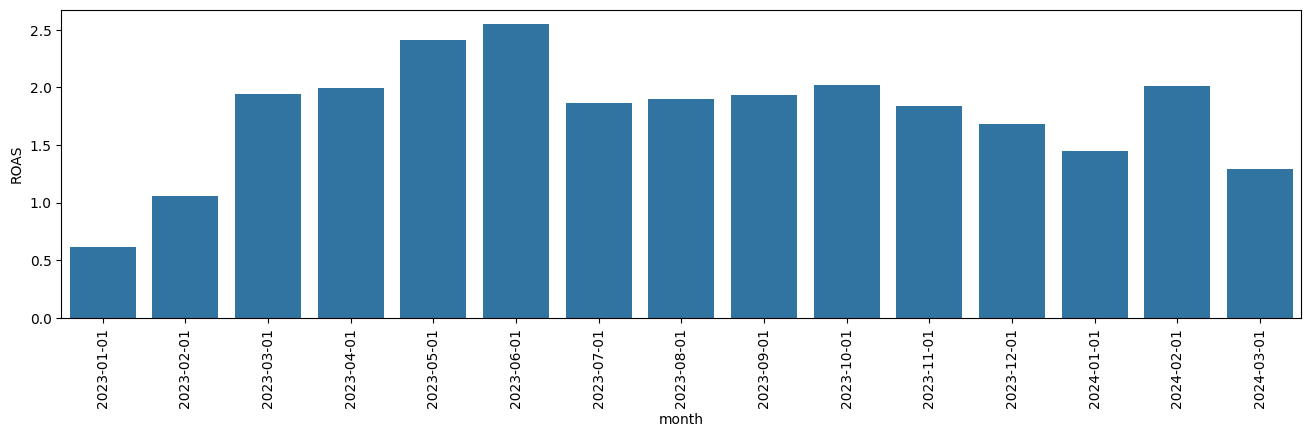

In [63]:
## Return on Ad Spends visualization
fig, axs = plt.subplots(nrows = 1, ncols = 1, figsize = (16,4))
sns.barplot(data = Order_Summary_NC, x = "month", y = "ROAS", ax = axs)
axs.tick_params(axis = 'x', rotation = 90)

### Customer Acquisition Cost

In [64]:
## Cost of acquiring new customers
First_time_CAC = pd.merge(First_time_customers, Facebook, left_on=["month"], right_on=["Month_new"])
First_time_CAC = First_time_CAC[["month", "customers", "total_sales","Amount spent (INR)"]].rename(columns={"Amount spent (INR)":"Facebook Spends"})
First_time_CAC = pd.merge(First_time_CAC, Google, left_on = "month", right_on="Month", how = "left")
First_time_CAC = First_time_CAC[["month", "customers", "total_sales","Facebook Spends", "Amount Spent"]].rename(columns = {"Amount Spent":"Google Spends"})

In [65]:
First_time_CAC["CAC"] = (First_time_CAC["Facebook Spends"] + First_time_CAC["Google Spends"])/First_time_CAC["customers"]

- Customer Acuisition Cost (CAC) has increased recently, due to which, business is not growing at good rate

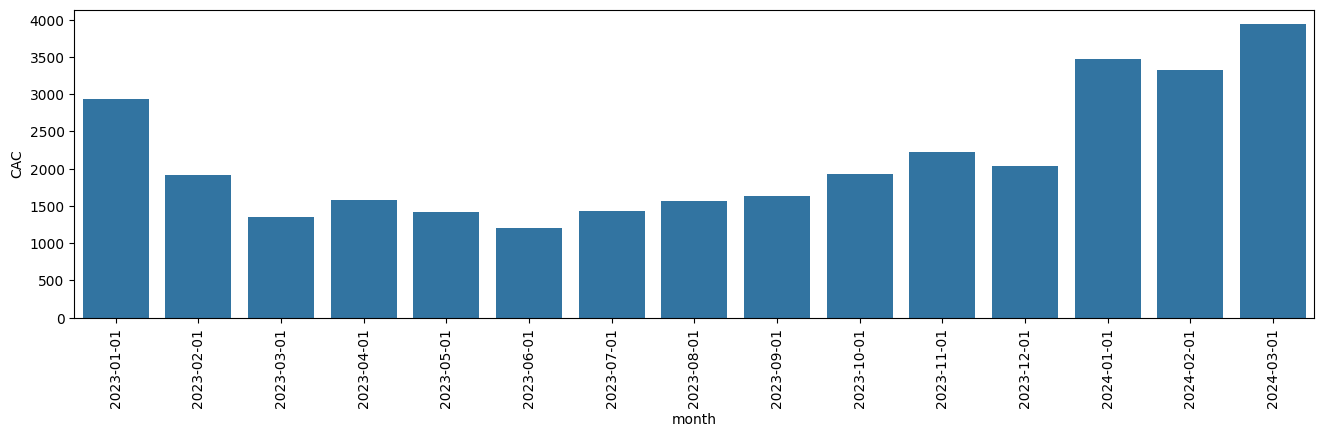

In [67]:
## Customer acquisition cost
fig, axs = plt.subplots(nrows = 1, ncols = 1, figsize = (16,4))
sns.barplot(data = First_time_CAC, x = "month", y = "CAC", ax = axs)
axs.tick_params(axis = 'x', rotation = 90)

### Cancelled Customers

- High cancellation during the period of January for both the Repeating and New Customers

In [114]:
## First Time Customers
First_time_cancelled = Order_Summary[(Order_Summary["customer_type"] == 'First-time') & (Order_Summary["cancelled"] == "Yes")]
cancelled_customers = First_time_cancelled.groupby(by = ["month","customer_type"], as_index=False)["customer_id"].nunique()

## Returning Cancelled Customers
Returning_Cancelled = Order_Summary[(Order_Summary["customer_type"] == "Returning") & (Order_Summary["cancelled"] == "Yes")]
R_cancelled_cust = Returning_Cancelled.groupby(by = ["month", "customer_type"], as_index=False)["customer_id"].nunique()

In [115]:
cancelled_customers_ttl = pd.concat([cancelled_customers,R_cancelled_cust], axis = 0)

### Customer Segementation based upon Recency, Frequency and Montetary

In [78]:
## Last sale calculation
Order_Summary_filtered = Order_Summary[Order_Summary["cancelled"] == "No"][["month", "customer_type", "order_id","customer_id", "total_sales"]]
Order_Summary_RFM = Order_Summary_filtered.groupby(by = ["customer_id"], as_index = False).agg({"total_sales":"sum", "month":"max", "order_id":"nunique"})
Order_Summary_RFM["month_1"] = (Order_Summary_RFM["month"].max().year - Order_Summary_RFM["month"].dt.year)*12 + (Order_Summary_RFM["month"].max().month - Order_Summary_RFM["month"].dt.month)
Order_Summary_RFM["month_1"] = -1*Order_Summary_RFM["month_1"]

In [81]:
Order_Summary_RFM = Order_Summary_RFM[["customer_id", "total_sales", "month_1","order_id"]]
Order_Summary_RFM.rename(columns={"order_id":"orders", "month_1":"Months", "total_sales":"sales"}, inplace=True)

In [82]:
RFM_Scores = Order_Summary_RFM[["sales","Months","orders"]].quantile([0.2,0.4, 0.6,0.8])
RFM_Scores

,sales,Months,orders
0.2,1350.0,-8.0,1.0
0.4,2400.0,-6.0,1.0
0.6,2400.0,-4.0,1.0
0.8,4700.0,-2.0,2.0


In [84]:
def RFM_assign(tbl, RFM_Scores):
    '''
    tbl : table with information about customers
    RFM_Scores : table with quartile ranges of variables
    '''
    for i in ["sales", "Months", "orders"]:
        if i == "sales":
            par = "M"
        elif i == "Months":
            par = "F"
        elif i == "orders":
            par = "R"
        tbl.loc[tbl[i] > RFM_Scores.loc[0.8,i],par] = 5
        tbl.loc[tbl[i] <= RFM_Scores.loc[0.8,i],par] = 4
        tbl.loc[tbl[i] <= RFM_Scores.loc[0.6,i],par] = 3
        tbl.loc[tbl[i] <= RFM_Scores.loc[0.4,i],par] = 2
        tbl.loc[tbl[i] <= RFM_Scores.loc[0.2,i],par] = 1

    return tbl
Order_Summary_RFM = RFM_assign(Order_Summary_RFM, RFM_Scores=RFM_Scores)  

In [ ]:
## RFM calculation
Order_Summary_RFM["RFM"] = Order_Summary_RFM["R"] + Order_Summary_RFM["F"] + Order_Summary_RFM["M"]

In [ ]:
## Segmentation to different groups
Order_Summary_RFM.loc[Order_Summary_RFM["RFM"] >= 13, "Group"] = "Diamond"
Order_Summary_RFM.loc[Order_Summary_RFM["RFM"] <= 13, "Group"] = "Gold"
Order_Summary_RFM.loc[Order_Summary_RFM["RFM"] <= 10, "Group"] = "Silver"
Order_Summary_RFM.loc[Order_Summary_RFM["RFM"] <= 5, "Group"] = "Bronze"

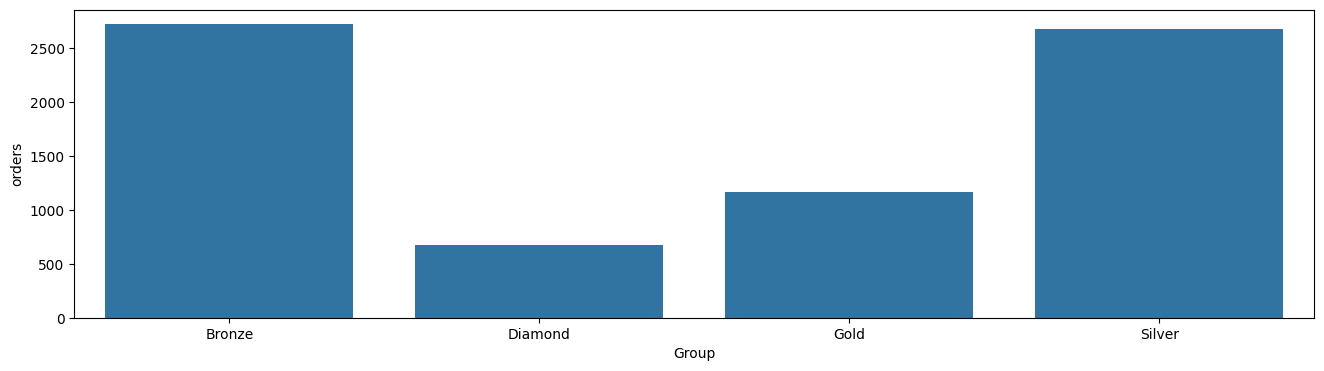

In [116]:
## Different group summary
Customer_Type_summary = Order_Summary_RFM.groupby(by = ["Group"], as_index=False)["orders"].count()
fig, axs = plt.subplots(nrows =1 , ncols = 1, figsize = (16,4))
sns.barplot(data = Customer_Type_summary, x = "Group", y = "orders")
plt.show()